In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# read our data
df = pd.read_csv("df.csv")

below is a description of our data variable. Challenge is to predict approval status of loan (Approved/ Reject)

|    VARIABLE   | DESCRIPTIONS |
| ---------- | --- |
| Loan_ID  |  Unique Loan ID |
| Gender   |  Male / Female |
| Married  |  Applicant married (Y/N)|
| Dependents | Number of dependents |
| Education | Applicant Education (Graduate / Under Graduate)|
| Self_Employed | Self employed (Y/N) |
| ApllicantIncome | Applicant income |
| CoappicantIncome | Coapplicant income |
| LoanAmount | Loan amount in thousands |
| Loan Amount_Term | Term of loan in months |
| Credit_History | credit history meets guidelines  |
| Property_Area | Urban / Semi Urban / rural  |
| __Loan_Status (label) __ | __Loan approved (Y/N)__ |

In [3]:
# show first 5 rows for data
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
# look at summary of numerical data
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [5]:
# Count the value for Property Area
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

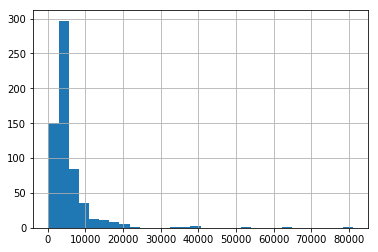

In [6]:
# plot the histogram of ApplicantIncome
df['ApplicantIncome'].hist(bins=30)

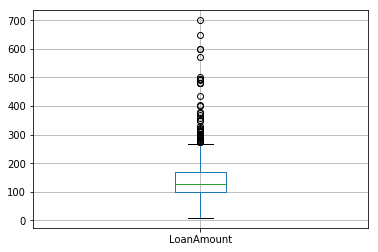

In [7]:
df.boxplot(column="LoanAmount")

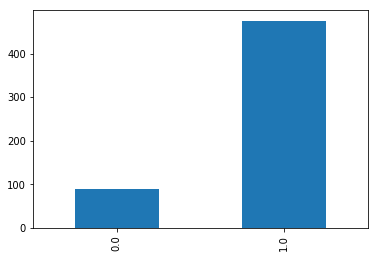

In [8]:
temp = df['Credit_History'].value_counts(ascending=True)
temp.plot(kind='bar')

In [9]:
# check how many NA in each features (columns)
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# fill LoanAmount NA with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [11]:
# fill self employed with No
df['Self_Employed'].fillna('No', inplace=True)

In [12]:
# simply frop all NA rows in our data
df.dropna(inplace=True)

In [13]:
# change categorical data into numeric by mapping string to number
from sklearn.preprocessing import LabelEncoder

catecorical_data = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Status"]
le = LabelEncoder()
for i in catecorical_data:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [14]:
# one-hot encoding features into more columns
one_hot = pd.get_dummies(df['Property_Area'], prefix='Area')
one_hot.head()

Area_Rural  Area_Semiurban  Area_Urban
0           0               0           1
1           1               0           0
2           0               0           1
3           0               0           1
4           0               0           1

In [15]:
df = pd.concat([df, one_hot], axis=1)
df.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  Area_Rural  Area_Semiurban  \
0             1.0         Urban            1           0               0   
1             1.0         Rural            0           1               0   
2             1.0         Urban            1           0               0   
3             1.0         Urban            1           0               0   
4             1.0         Urban            1           0               0   

   Area_Urban  
0           1  
1           0  
2           1  
3           1  
4           1

In [16]:
# remove the columns we don't need it
del df['Loan_ID']
del df['Property_Area']

In [17]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Loan_Status  Area_Rural  Area_Semiurban  Area_Urban  
0            1           0               0           1  
1            0           1               0           0  
2            1           0               0           1  
3            1           0               0           1  
4            1           0               0           1

In [18]:
features = df.drop(["Loan_Status"], axis=1)
label = df['Loan_Status']
print(features.shape)
print(label.shape)

(524, 13)
(524,)


In [23]:
features.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Area_Rural  Area_Semiurban  Area_Urban  
0           0               0           1  
1           1               0           0  
2           0               0           1  
3           0               0           1  
4           0               0           1

In [44]:
# train / test split our data
x_train, x_test, y_train, y_test = train_test_split(features, label)

In [45]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
y_pred = clf.predict(x_test)

In [47]:
accuracy_score(y_test, y_pred)

0.70992366412213737